In [90]:
import numpy as np
import scipy.signal as signal
import scipy.integrate
import matplotlib.pyplot as plt
from scipy.fftpack import fft

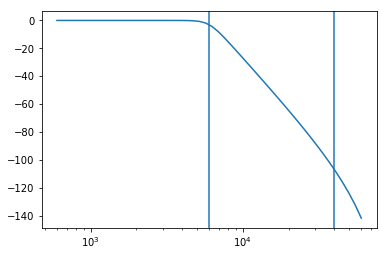

In [55]:
fs=193e3
fcut=6e3
order = 6

fmin = fcut/10
fmax = np.min([10*fcut,fs/2])

lpf = signal.iirfilter(order,fcut/(fs/2),btype='low')
w,h = signal.freqz(lpf[0],lpf[1],np.logspace(np.log10(fmin),np.log10(fmax))/fs*np.pi*2)
#w,h = signal.freqz(lpf[0],lpf[1])

plt.semilogx(fs*w/(2*np.pi),20*np.log10(np.abs(h)))
plt.axvline(x=fcut)
plt.axvline(x=40e3)

plt.show()


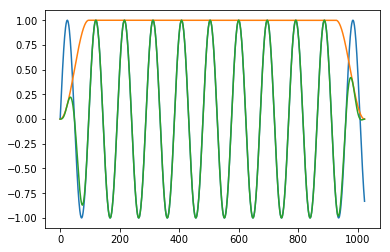

In [26]:
n=1024
fs=48e3
f0=0.5e3
sig = np.sin(np.r_[0:n]*2*np.pi*f0/fs)
win = signal.tukey(n,2*fs/n/f0,sym=True)

plt.plot(sig)
plt.plot(win)
plt.plot(sig*win)
plt.show()

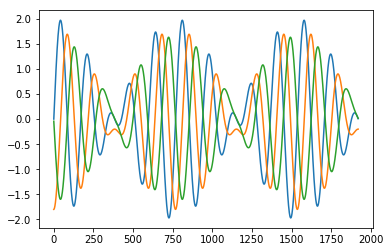

In [89]:
fs = 192e3
f0 = 1e3
P = 10
n = np.ceil(P*fs/f0).astype('int')
sig = np.sin(2*np.pi*np.r_[0:n]*f0/fs) + np.sin(2.5*np.pi*np.r_[0:n]*f0/fs)
isig = scipy.integrate.cumtrapz(sig,dx=1/fs)
isig = np.cumsum(sig)/fs
isig = isig - np.mean(isig)
iisig = np.cumsum(isig)/fs
iisig = iisig - np.mean(iisig)
plt.plot(sig)
plt.plot(2*np.pi*f0*isig)
plt.plot((2*np.pi*f0)**2*iisig)
plt.show()

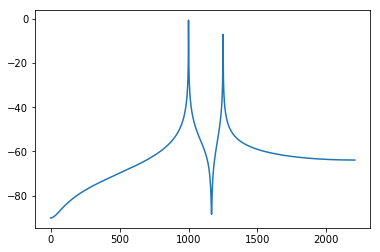

In [109]:
fs = 5e3
f0 = 1.133e3
P = 1000
n = np.ceil(P*fs/f0).astype('int')
sig = np.sin(2*np.pi*np.r_[0:n]*f0/fs) + 0.5*np.sin(2.5*np.pi*np.r_[0:n]*f0/fs)
spec = fft(sig)/n
plt.plot(20*np.log10(np.abs(spec[:(n/2).astype('int')])*2))
plt.show()